In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('diabetic_data.csv') 

In [175]:
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [176]:
data = data.drop('encounter_id', axis=1)


In [177]:
data.shape

(101766, 49)

In [178]:
data.head(5)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [179]:
data.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

In [180]:
data = data.replace('?', np.nan)

In [181]:
data.head(10)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,...,No,No,No,No,No,No,No,No,Yes,>30
8,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [182]:
data.isnull().sum()

patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [183]:


# Sample data (replace with your actual data)

# Convert 'readmitted' to binary classification
def convert_readmission(value):
  if value == '<30':
    return 1
  else:
    return 0

data['readmitted'] = data['readmitted'].apply(convert_readmission)




In [184]:
display(data.iloc[12])

patient_nbr                               85504905
race                                     Caucasian
gender                                      Female
age                                        [40-50)
weight                                         NaN
admission_type_id                                1
discharge_disposition_id                         3
admission_source_id                              7
time_in_hospital                                 7
payer_code                                     NaN
medical_specialty           Family/GeneralPractice
num_lab_procedures                              60
num_procedures                                   0
num_medications                                 15
number_outpatient                                0
number_emergency                                 1
number_inpatient                                 0
diag_1                                         428
diag_2                                      250.43
diag_3                         

In [185]:
count_ones = data['readmitted'].sum()

In [186]:
print(count_ones)

11357


In [187]:
data.shape

(101766, 49)

In [188]:
data['readmitted'] = data['readmitted'].astype(bool)


In [189]:
print(data.dtypes)

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [190]:
missing_percentages = data.isnull().sum() / len(data) * 100


In [191]:
columns_to_drop = missing_percentages[missing_percentages > 90].index


In [192]:
data = data.drop(columns_to_drop, axis=1)


In [193]:
data.shape

(101766, 48)

In [194]:

# Columns with no variations
no_variation_cols = ['examide', 'citoglipton']


# Drop all columns 
data = data.drop(no_variation_cols, axis=1) 


In [195]:
near_zero_variance_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 
                           'glimepiride', 'acetohexamide', 'tolbutamide', 
                           'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                            'glyburide-metformin', 
                           'glipizide-metformin', 'glimepiride-pioglitazone', 
                           'metformin-rosiglitazone', 'metformin-pioglitazone']

data = data.drop(near_zero_variance_cols, axis=1) 

In [196]:
data.shape

(101766, 31)

In [197]:
data.dropna(inplace=True)


In [198]:
data.shape

(26755, 31)

In [199]:
numerical_columns = data.select_dtypes(include=np.number)
print(numerical_columns)

        patient_nbr  admission_type_id  discharge_disposition_id  \
20446      20123568                  1                        22   
20737      20377854                  2                         1   
20824      20408121                  1                         1   
21083      20542797                  1                         2   
23879       7239654                  1                         3   
...             ...                ...                       ...   
101735    106595208                  2                         6   
101743     47293812                  1                        13   
101747     33230016                  1                        22   
101749    106392411                  3                         6   
101764     31693671                  2                         3   

        admission_source_id  time_in_hospital  num_lab_procedures  \
20446                     7                 7                  58   
20737                     1                 3

In [200]:
print(numerical_columns.describe())

        patient_nbr  admission_type_id  discharge_disposition_id  \
count  2.675500e+04       26755.000000              26755.000000   
mean   5.732865e+07           2.019137                  2.959821   
std    3.710987e+07           0.946664                  4.327149   
min    7.290000e+02           1.000000                  1.000000   
25%    2.425177e+07           1.000000                  1.000000   
50%    4.401274e+07           2.000000                  1.000000   
75%    9.230198e+07           3.000000                  3.000000   
max    1.893659e+08           6.000000                 28.000000   

       admission_source_id  time_in_hospital  num_lab_procedures  \
count         26755.000000      26755.000000        26755.000000   
mean              4.972267          4.317922           40.756681   
std               3.522615          2.949791           19.965546   
min               1.000000          1.000000            1.000000   
25%               1.000000          2.000000   

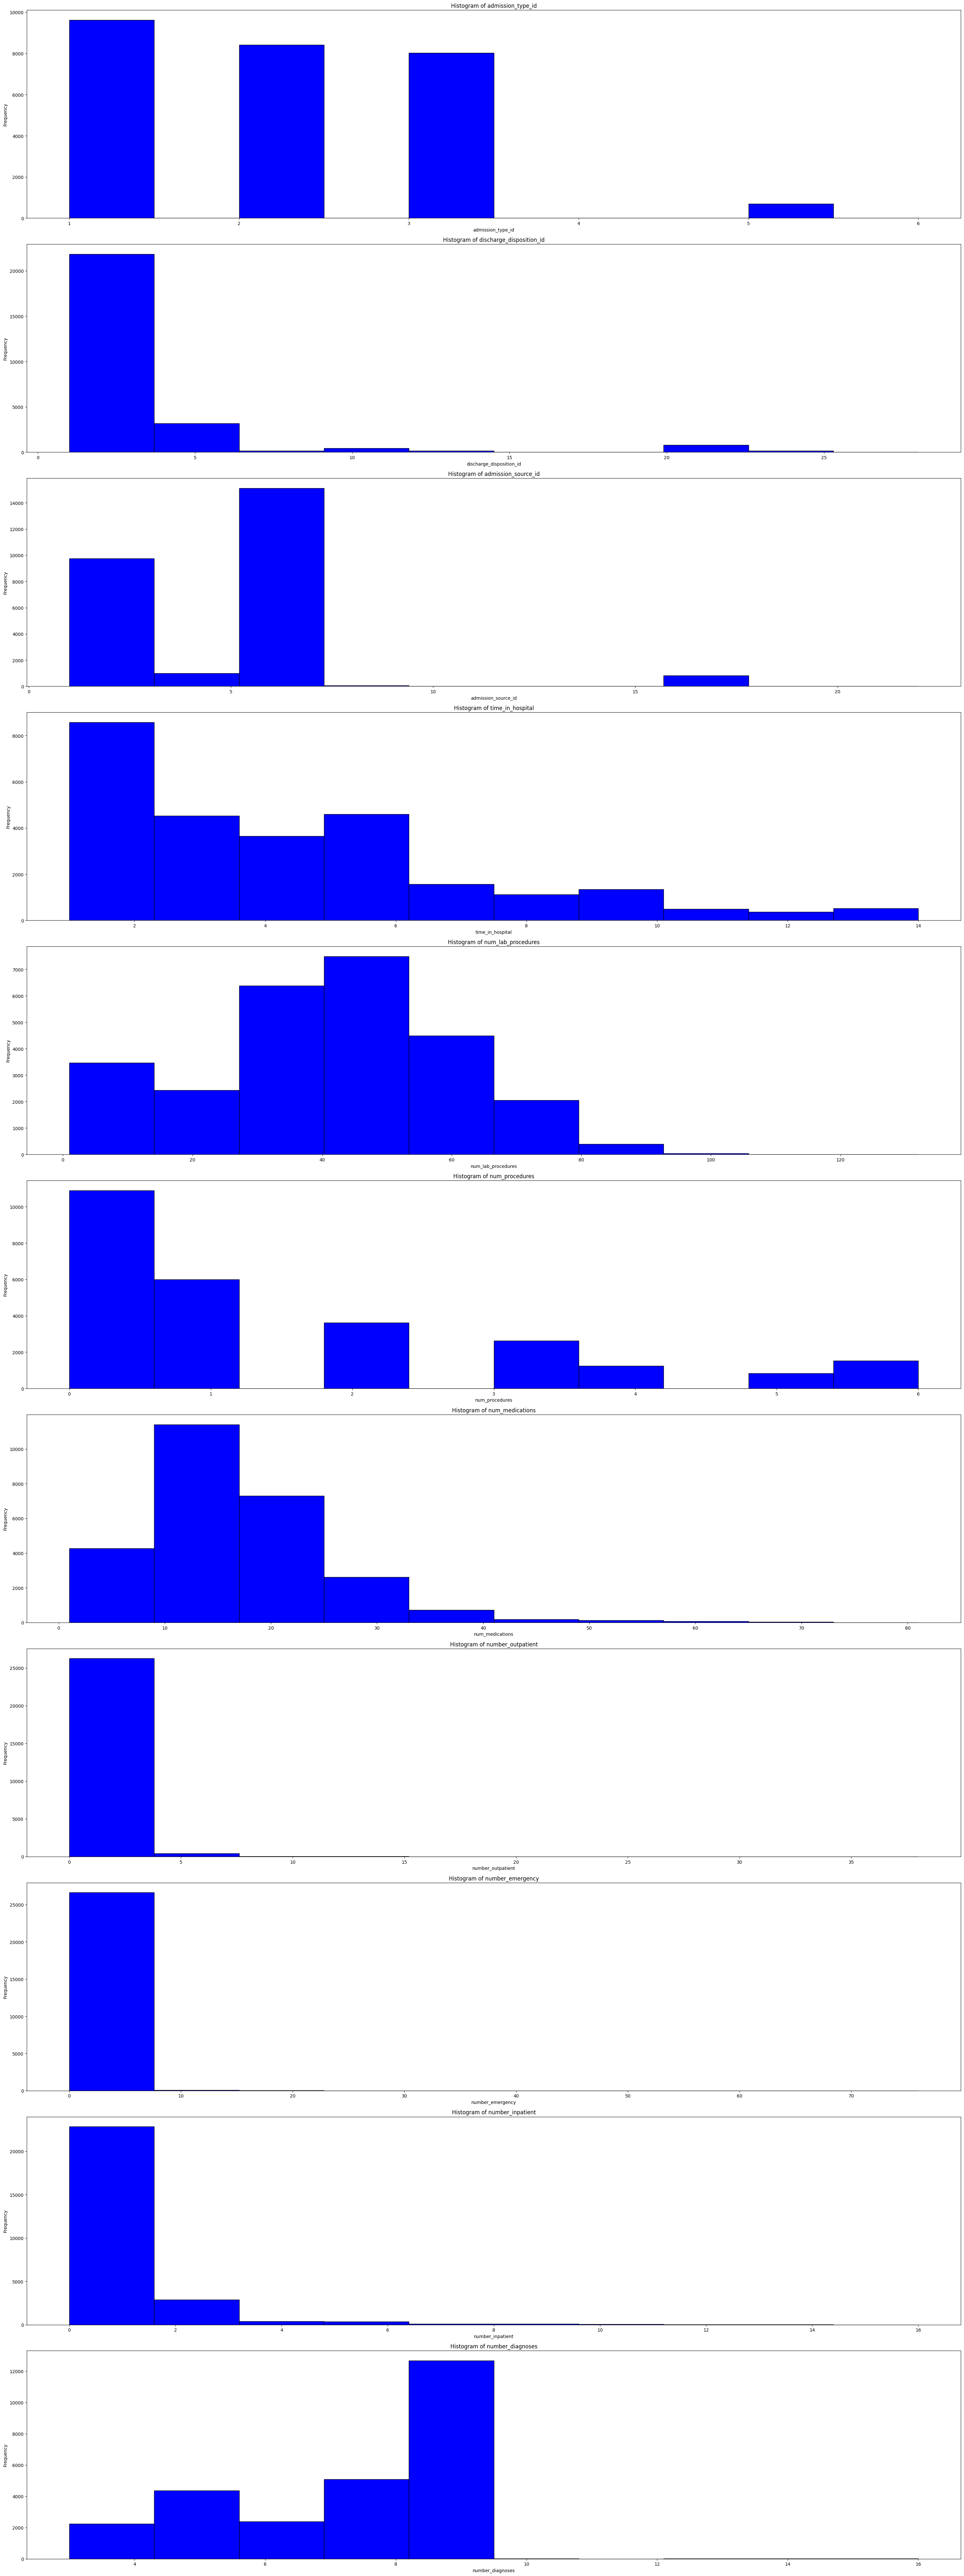

In [201]:
features = ['admission_type_id', 'discharge_disposition_id','admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

# Create a figure and subplots (2 rows, 1 column in this case)
fig, axes = plt.subplots(11, 1, figsize=(30, 80))  # Adjust figsize as needed

# Plot histograms for each feature on separate subplots
for i, feature in enumerate(features):
  axes[i].hist(data[feature], bins=10, color='blue', edgecolor='black')
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Frequency')
  axes[i].set_title(f'Histogram of {feature}')

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

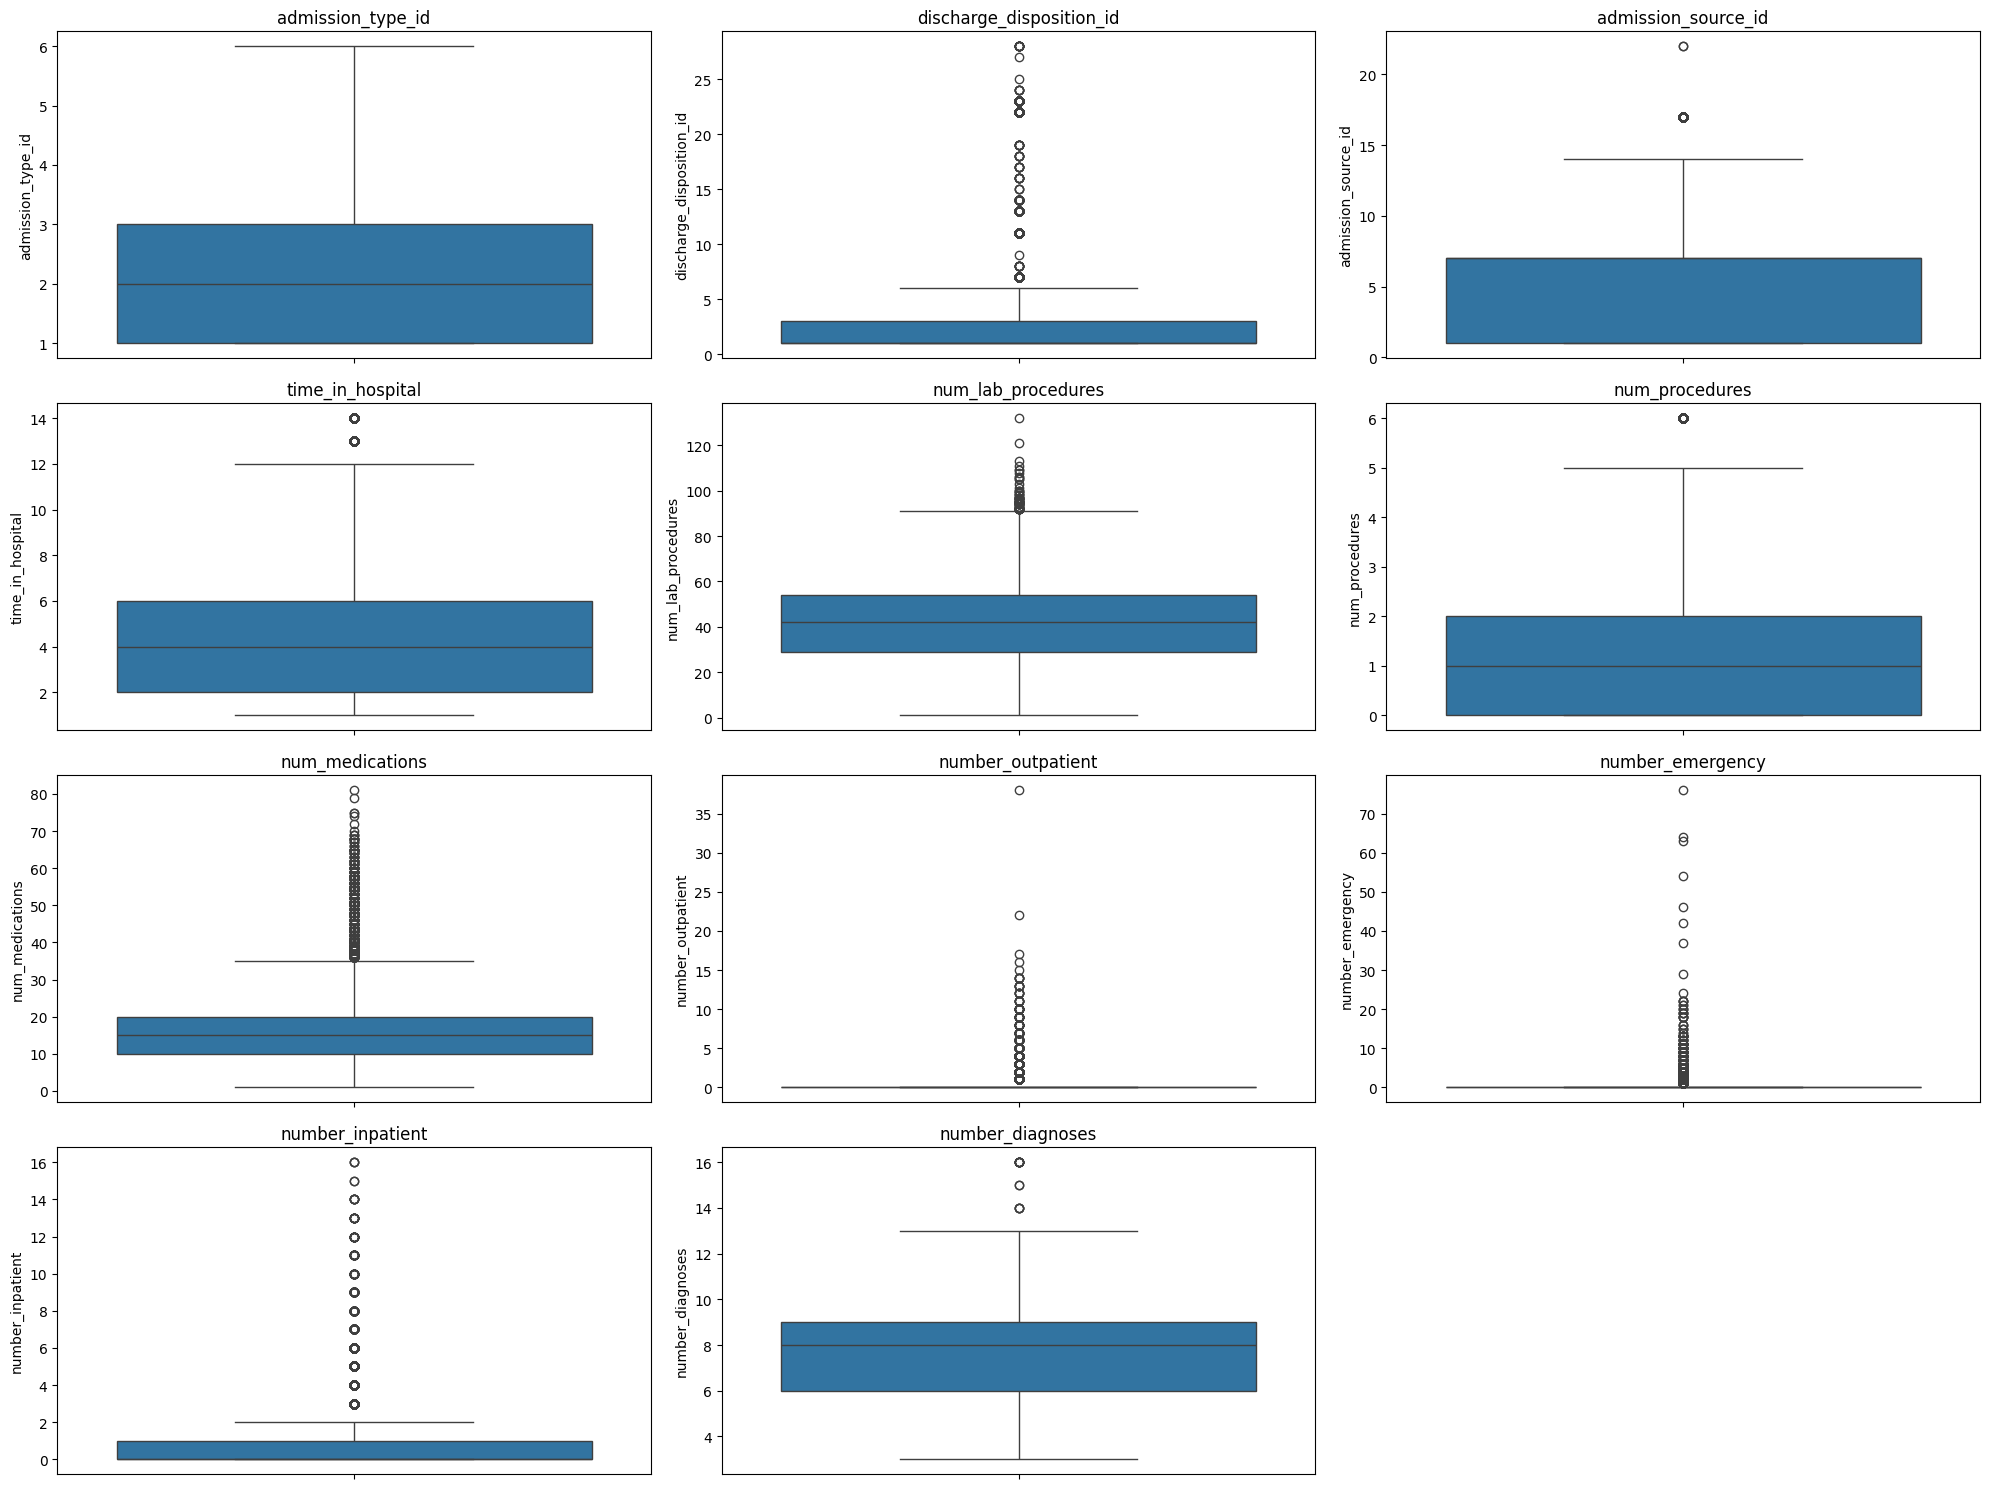

In [202]:
features_boxplot = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting the boxplots for each feature separately
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_boxplot, start=1):
    plt.subplot(4, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust the layout to not overlap the plots
plt.show()

In [203]:
def remove_outliers_zscore(data, features):
    # Calculate Z-scores for the selected features
    z_scores = stats.zscore(data[features])
    # Identify rows where all the features have Z-scores within 3 standard deviations
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    # Return the filtered data
    return data[filtered_entries]

# Selected features
features_selected = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                        'time_in_hospital',  'num_procedures', 
                        'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Removing outliers from the selected features
df_cleaned1 = remove_outliers_zscore(data, features_selected)

In [214]:
def remove_outliers_iqr(df, features):
    # Create a copy of the dataframe to avoid modifying the original one
    df_copy = df.copy()
  
    for feature in features:
        Q1 = df_copy[feature].quantile(0.25)
        Q3 = df_copy[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Use numpy.clip to limit the values based on the IQR calculation
        df_copy[feature] = np.clip(df_copy[feature], lower_bound, upper_bound)

    return df_copy

# Assuming df_cleaned1 is your original DataFrame and you want to remove outliers from it
# Features to process for outlier removal
features = ['num_lab_procedures', 'num_medications']

# Apply outlier removal directly to your DataFrame
df_cleaned2 = remove_outliers_iqr(df_cleaned1, features)


In [216]:
df_cleaned1.shape

(23600, 31)

In [205]:
df_cleaned1.shape

(23600, 31)

In [206]:
data.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [207]:
df_cleaned = df_cleaned1.copy()  # replace 'df_original' with your original DataFrame's name

# Features to be normalized
features_normalize = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                      'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features using .loc for proper setting
df_cleaned.loc[:, features_normalize] = scaler.fit_transform(df_cleaned[features_normalize])

# Now df_cleaned should be modified without affecting the original and without warning
print(df_cleaned[features_normalize].head())

       admission_type_id  discharge_disposition_id  admission_source_id  \
20737           0.333333                  0.000000             0.000000   
20824           0.000000                  0.000000             0.461538   
21083           0.000000                  0.071429             0.461538   
23879           0.000000                  0.142857             0.384615   
23922           0.000000                  0.142857             0.384615   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
20737          0.166667            0.442748        0.500000         0.128205   
20824          0.250000            0.419847        0.166667         0.102564   
21083          0.750000            0.511450        0.166667         0.217949   
23879          0.916667            0.580153        0.833333         0.230769   
23922          0.916667            0.450382        0.833333         0.115385   

       number_outpatient  number_emergency  number_inpatient  number

In [208]:
df_cleaned.shape

(23600, 31)

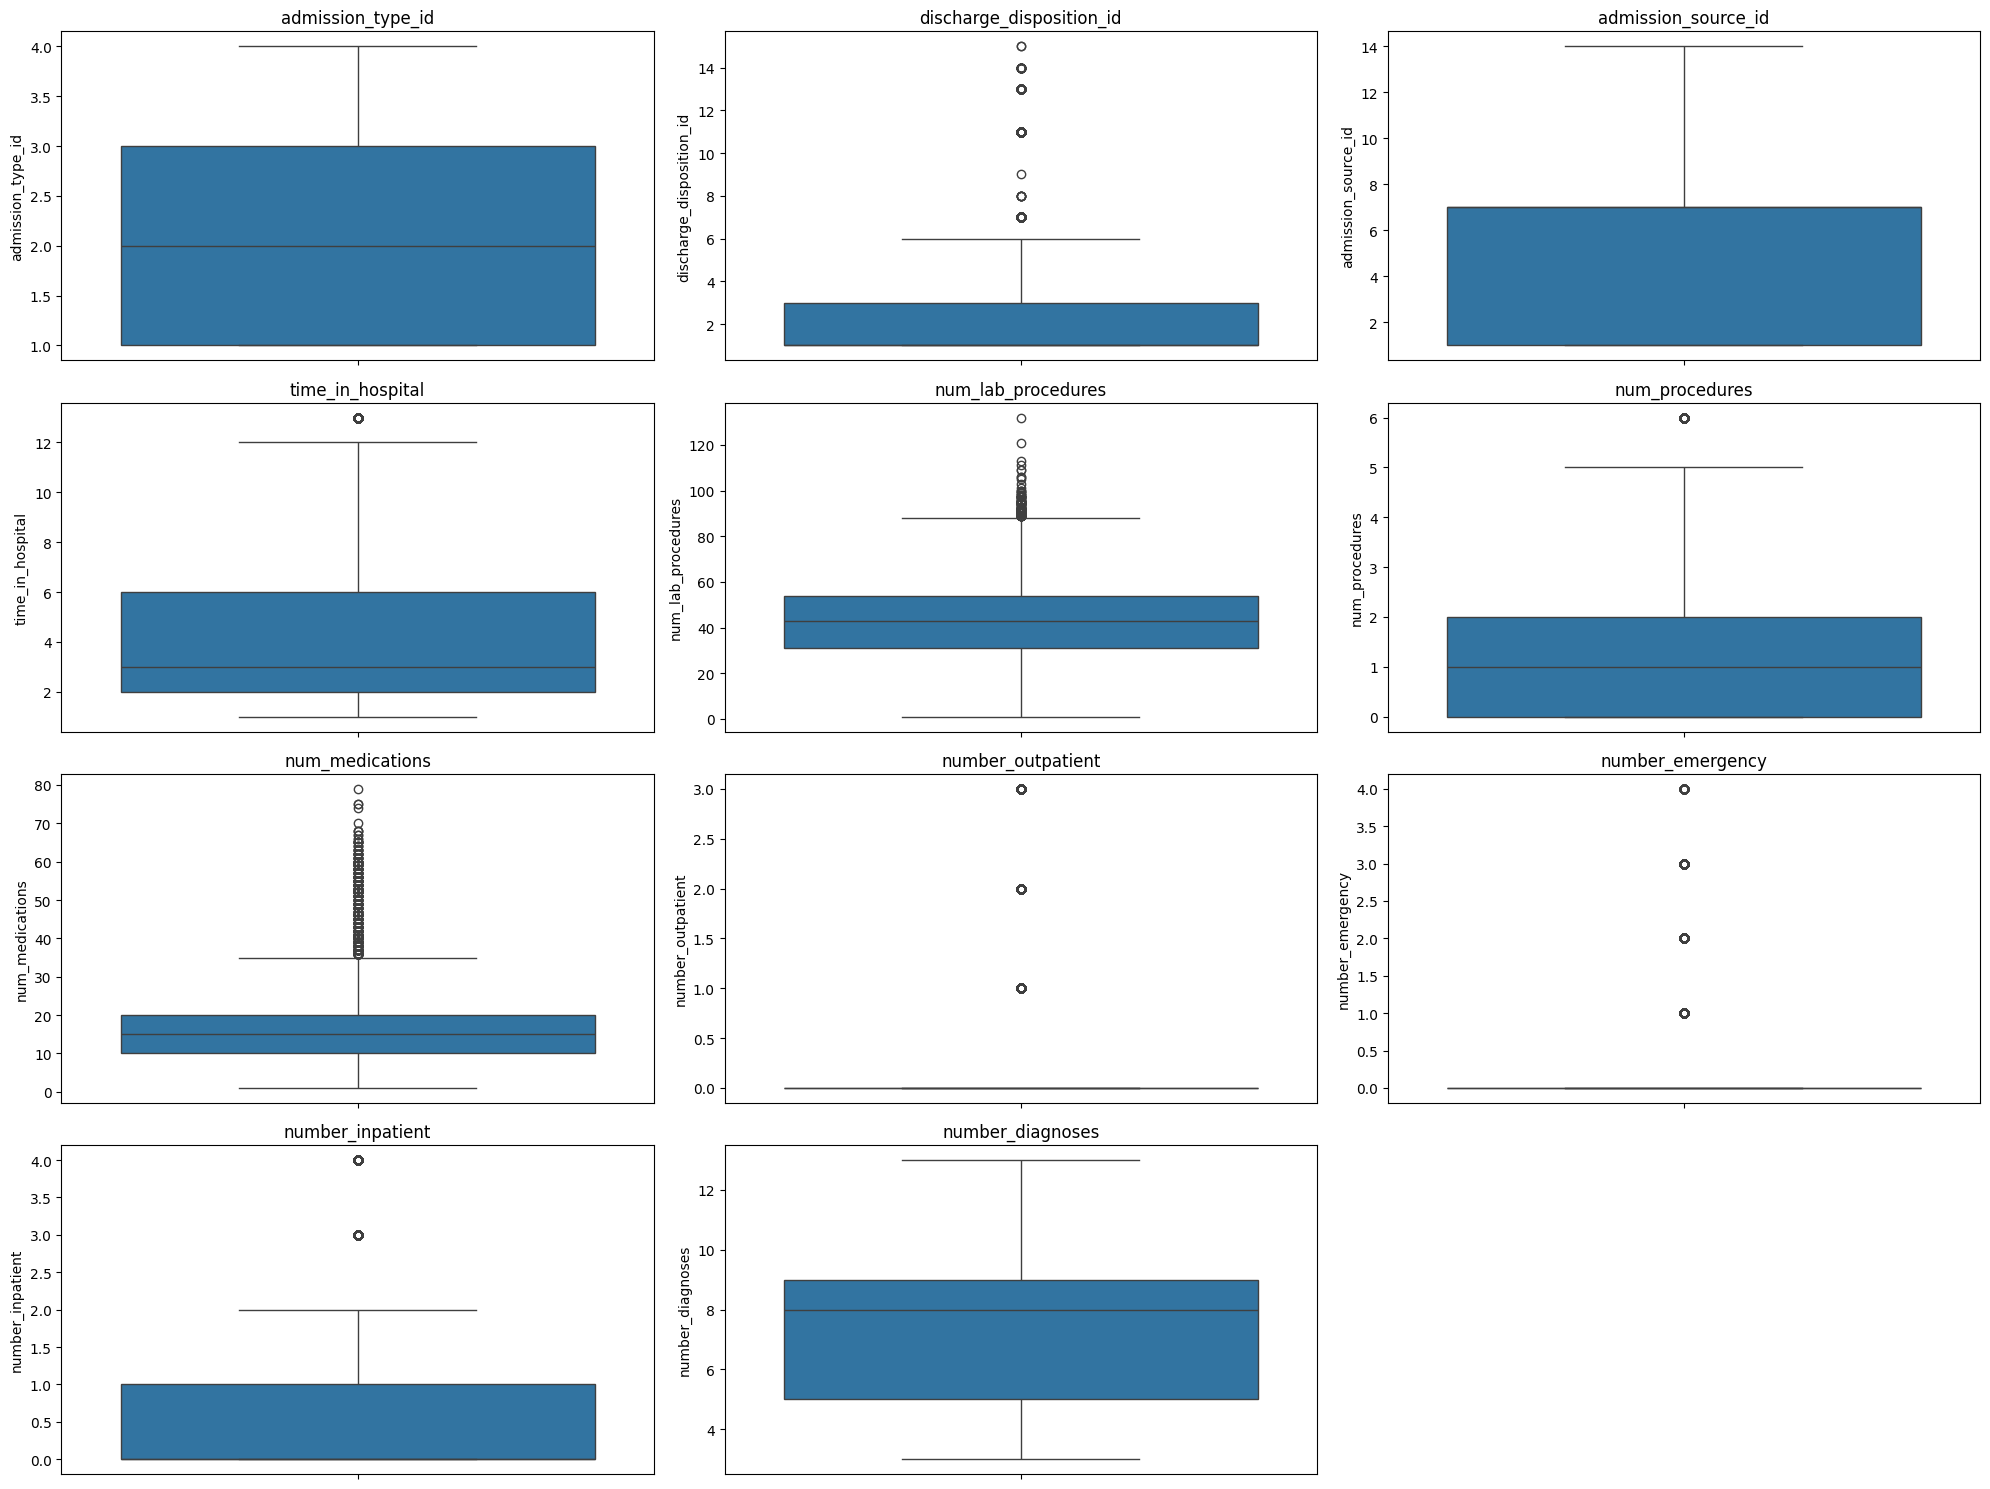

In [209]:
features_boxplot = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting the boxplots for each feature separately
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_boxplot, start=1):
    plt.subplot(4, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=df_cleaned1[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust the layout to not overlap the plots
plt.show()

In [210]:
df_cleaned.to_csv("cleaned_data.csv", index=False)